# Machine learning for Public Policy
## HW5: Improving pipeline
### Takuya Ando

### 0. Checking the overview of the data and missing values 

In [83]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import importlib
import revmlpipeline
import analyzedata
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv("projects_2012_2013.csv")

First, when we see the overview of the data, "secondary_focus_subject" and "secondary_focus_area" seems to have biggest number of missing values.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124976 entries, 0 to 124975
Data columns (total 26 columns):
projectid                                 124976 non-null object
teacher_acctid                            124976 non-null object
schoolid                                  124976 non-null object
school_ncesid                             115743 non-null float64
school_latitude                           124976 non-null float64
school_longitude                          124976 non-null float64
school_city                               124976 non-null object
school_state                              124976 non-null object
school_metro                              109752 non-null object
school_district                           124804 non-null object
school_county                             124976 non-null object
school_charter                            124976 non-null object
school_magnet                             124976 non-null object
teacher_prefix                           

Then, as we plot missing values in heatmap, missing values are distributed without bias in the data. Therefore, we can just omit the data with missing values. 

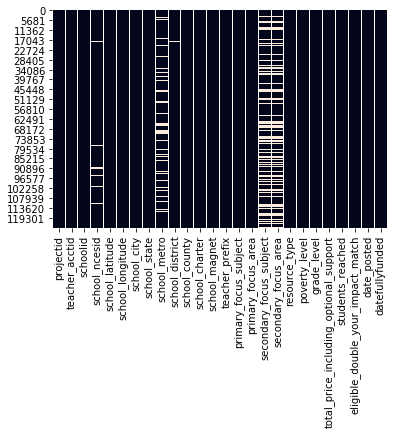

In [4]:
sns.heatmap(df.isnull(), cbar=False)

### 1. Experimenting with hyper parameters for each model

Below are the results of changing hyper parameters for each model. For some models, we can see significant difference when we change the parameters. 

In [76]:
analyzedata.experiment("KNN")

KNN; k=1
accuracy, precision, recall, f1, ap, auc
[0.58567663 0.28604036 0.31231891 0.29798968 0.28367052 0.50261169]
KNN; k=3
accuracy, precision, recall, f1, ap, auc
[0.43639266 0.28658139 0.66761755 0.40015022 0.28656132 0.50845645]
KNN; k=10
accuracy, precision, recall, f1, ap, auc
[0.57838262 0.29836713 0.36117895 0.32481408 0.29586139 0.52100773]
KNN; k=20
accuracy, precision, recall, f1, ap, auc
[0.56091118 0.30468446 0.42453259 0.35156946 0.30130602 0.52946326]
KNN; k=50
accuracy, precision, recall, f1, ap, auc
[0.54577425 0.30228797 0.45213089 0.35834733 0.30294988 0.53043747]


In [77]:
analyzedata.experiment("decision_tree")

DecisionTree; depth=1
accuracy, precision, recall, f1, ap, auc
[0.44853535 0.31047681 0.78567924 0.44478646 0.30438402 0.54941327]
DecisionTree; depth=3
accuracy, precision, recall, f1, ap, auc
[0.52312401 0.32141048 0.60469148 0.41502868 0.31777433 0.562334  ]
DecisionTree; depth=5
accuracy, precision, recall, f1, ap, auc
[0.52570643 0.31947171 0.60420537 0.4175684  0.3216964  0.56426015]
DecisionTree; depth=10
accuracy, precision, recall, f1, ap, auc
[0.52435438 0.31330865 0.5699703  0.40273025 0.31237532 0.54650966]
DecisionTree; depth=20
accuracy, precision, recall, f1, ap, auc
[0.54043474 0.30445385 0.48198642 0.37080538 0.30060069 0.52783729]


In [78]:
analyzedata.experiment("SVM")

SVM; C=0.1
accuracy, precision, recall, f1, ap, auc
[0.34430706 0.29246987 0.91411569 0.4404257  0.24694422 0.43498116]
SVM; C=1
accuracy, precision, recall, f1, ap, auc
[0.44501531 0.29092828 0.68001047 0.34571123 0.27223536 0.47710396]
SVM; C=10
accuracy, precision, recall, f1, ap, auc
[0.44514774 0.29084559 0.68018937 0.34569662 0.27757335 0.48661823]
SVM; C=100
accuracy, precision, recall, f1, ap, auc
[0.28934474 0.28251611 0.98372243 0.43811702 0.28099857 0.49162674]


In [79]:
analyzedata.experiment("logistic_regression")

Log; C=0.1
accuracy, precision, recall, f1, ap, auc
[0.52512845 0.32315779 0.60058482 0.41248806 0.33193888 0.57176102]
Log; C=1
accuracy, precision, recall, f1, ap, auc
[0.52639752 0.32345359 0.59828522 0.41217002 0.33204282 0.57180851]
Log; C=10
accuracy, precision, recall, f1, ap, auc
[0.52685541 0.32372049 0.59814731 0.41233933 0.33207203 0.57181735]
Log; C=100
accuracy, precision, recall, f1, ap, auc
[0.52685541 0.32372049 0.59814731 0.41233933 0.3320723  0.57181504]


In [80]:
analyzedata.experiment("random_forest")

RF; n_estimator=1
accuracy, precision, recall, f1, ap, auc
[0.54258144 0.29950344 0.45981695 0.36131663 0.29515109 0.51909194]
RF; n_estimator=5
accuracy, precision, recall, f1, ap, auc
[0.53889525 0.3018654  0.4783873  0.36844061 0.29921801 0.52335922]
RF; n_estimator=10
accuracy, precision, recall, f1, ap, auc
[0.54190005 0.30706335 0.48931911 0.37525072 0.30176182 0.52750789]
RF; n_estimator=20
accuracy, precision, recall, f1, ap, auc
[0.54131475 0.30536452 0.4844298  0.37262923 0.30254621 0.52756245]
RF; n_estimator=50
accuracy, precision, recall, f1, ap, auc
[0.54206052 0.30491658 0.48054116 0.37117621 0.30233723 0.52713948]
RF; n_estimator=100
accuracy, precision, recall, f1, ap, auc
[0.5409369  0.30514874 0.48433951 0.37237272 0.30279066 0.52758979]


### 2. Application of models and results

Now, we can apply our pipeline models to the data. We can see the tables for each model which include precision, recall and AUC_ROC as metrics by running the codes below. Baseline here is the model which always predicts 1.

The features used for prediction here are "school_metro", "poverty_level", "students_reached" and "eligible_double_your_impact_match". The reason for the choice of these featurea are, first, the location, economic situation and its social status("school_metro", "poverty_level", "eligible_double_your_impact_match") would affect the school's credibility and success of funding. Then, the number of students reached would be also important, because the more the needs for the money, the more time would be needed to be fully funded.

In [64]:
%run -i revmlpipeline.py

In [82]:
analyzedata.analyze()

Baseline;


,0.01,0.02,0.05,0.1,0.2,0.3,0.5,0.7
precision,0.282569,0.282569,0.282569,0.282569,0.282569,0.282569,0.282569,0.282569
recall,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


KNN model;


,0.01,0.02,0.05,0.1,0.2,0.3,0.5,0.7
precision,0.285988,0.285988,0.285988,0.285988,0.285988,0.295084,0.304349,0.304349
recall,0.759937,0.759937,0.759937,0.759937,0.759937,0.381552,0.108449,0.108449
auc,0.513526,0.513526,0.513526,0.513526,0.513526,0.513526,0.513526,0.513526


Decision Tree model;


,0.01,0.02,0.05,0.1,0.2,0.3,0.5,0.7
precision,0.284109,0.284173,0.284297,0.284992,0.290647,0.305177,0.315829,0.299188
recall,0.839424,0.839286,0.838484,0.824126,0.709201,0.480308,0.101205,0.058347
auc,0.526615,0.526615,0.526615,0.526615,0.526615,0.526615,0.526615,0.526615


SVM model;


,0.01,0.02,0.05,0.1,0.2,0.3,0.5,0.7
precision,0.283070,0.283342,0.285562,0.291147,0.290962,0.290928,0.293995,0.291641
recall,0.991547,0.914606,0.778412,0.729592,0.693408,0.680010,0.650243,0.617445
auc,0.477104,0.477104,0.477104,0.477104,0.477104,0.477104,0.477104,0.477104


Logistic regression model;


,0.01,0.02,0.05,0.1,0.2,0.3,0.5,0.7
precision,0.282569,0.282569,0.282569,0.282569,0.286347,0.323454,0.000000,0.000000
recall,1.000000,1.000000,1.000000,1.000000,0.978096,0.598285,0.000000,0.000000
auc,0.571809,0.571809,0.571809,0.571809,0.571809,0.571809,0.571809,0.571809


Random forest model;


,0.01,0.02,0.05,0.1,0.2,0.3,0.5,0.7
precision,0.283878,0.283794,0.283612,0.284612,0.288958,0.305365,0.319806,0.326783
recall,0.931623,0.924446,0.897426,0.861600,0.736942,0.484430,0.131255,0.044117
auc,0.527562,0.527562,0.527562,0.527562,0.527562,0.527562,0.527562,0.527562


Bagging model;


,0.01,0.02,0.05,0.1,0.2,0.3,0.5,0.7
precision,0.282569,0.282569,0.282569,0.282569,0.282569,0.326592,0.000000,0.000000
recall,1.000000,1.000000,1.000000,1.000000,1.000000,0.510298,0.000000,0.000000
auc,0.568181,0.568181,0.568181,0.568181,0.568181,0.568181,0.568181,0.568181


Boosting model;


,0.01,0.02,0.05,0.1,0.2,0.3,0.5,0.7
precision,0.282569,0.282569,0.282569,0.282569,0.282569,0.282569,0.000000,0.000000
recall,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
auc,0.565504,0.565504,0.565504,0.565504,0.565504,0.565504,0.565504,0.565504


The baseline has the precision of 28.2%. As we can see from the tables, any model cannot show clearly higher performance than baseline. If we try to acquire higher precision, we have to wxperience huge decline in recall. From the viewpoint of auc, logistic regression model showed highest performance af all.